Week 10: Instructor-Led: Data Reduction <br>

Author: Parker Munsey <br>
Course: BGEN632 Grad. Intro. to Python <br> 
Term: Spring 2025 <br> 
Date Due: May 7th, 2025 <br> 

Eigenvalues:
 [5.72134563e+00 1.07657967e+00 1.91383827e-01 9.31699632e-02
 3.29143500e-02 1.27322677e-03 5.91421134e-22]


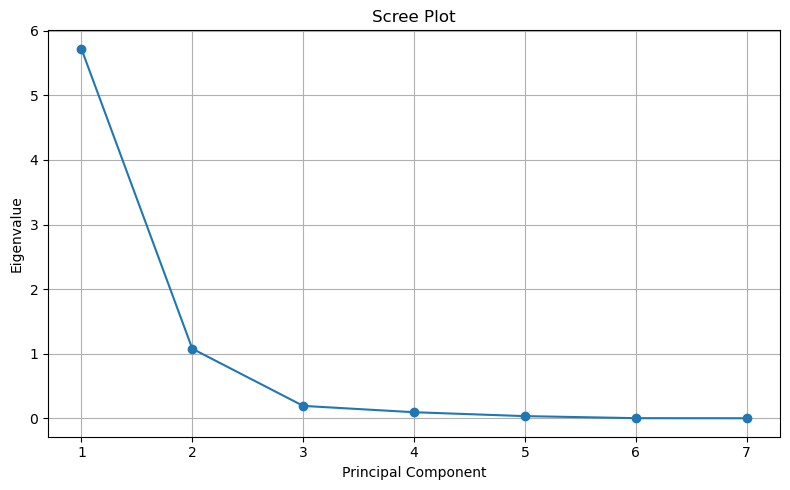


Confusion Matrix for Teaching:
Teaching  Small/Rural  Teaching
Cluster                        
0                  44         2
1                   0         3
2                   0        12

Confusion Matrix for TypeControl:
TypeControl  City/County  District  Investor  Non Profit
Cluster                                                 
0                      2        14         3          27
1                      0         0         0           3
2                      5         0         0           7

Confusion Matrix for DonorType:
DonorType  Alumni  Charity
Cluster                   
0               2       44
1               3        0
2              12        0


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')


# Load the dataset (use your path if running locally)
hospital = pd.read_csv(r"C:\Users\TechnellogicPC\UTW\Python\week10labs\calihospital.txt", delimiter='\t')

# Select relevant numerical columns for PCA and clustering
numerical_cols = ['NoFTE', 'NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'AvlBeds']
hospital_numeric = hospital[numerical_cols].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hospital_numeric)

# Run PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
eigenvalues = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_

# Display eigenvalues
print("Eigenvalues:\n", eigenvalues)

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.tight_layout()
plt.show()

# Decide on number of clusters (e.g., k = 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original DataFrame
hospital['Cluster'] = clusters

# Create confusion matrices for categorical variables
categorical_vars = ['Teaching', 'TypeControl', 'DonorType']
for var in categorical_vars:
    print(f"\nConfusion Matrix for {var}:")
    print(pd.crosstab(hospital['Cluster'], hospital[var]))



Based on the PCA results, the first two components have eigenvalues greater than (5.72 and 1.08). <br>

According to Kaiser Criterion, only components with eigenvalues greater than 1 should be retained, which suggests keeping 2 components. <br>

Additionally the scree plot show an elbow after the second component, indicating diminishing returns in variance explained.  Both criteria support reducing the data to 2 principal components for further analysis. <br> 

K-Means Clustering Justification <br> 
The selections of k=3 as a starting point for clustering based on explotory analysist. <br>
This value allows for meaningful segmentation across potential hospital characteristics such as financial structure and teaching status. It also aligns with possible latent groupings in the PCA-reduced space. <br> 

Best Grouping Variable <br>
Among the categorical variables analyzed (Teaching, TypeControl, and DonorType), the Teaching variable aligned best with the clusters. <br>
The confusion matrix for Teaching showed that Cluster 0 consists almost entirely of "Small/Rural" hospitals, while Cluster 2 includes mostly "Teaching" hospitals, suggesting that the KMeans model effectively captured structural differences aligned with this feature.

References: <br>

Pandas Documentation – Data manipulation and CSV loading <br>
https://pandas.pydata.org/docs/ <br>

Scikit-learn PCA and KMeans – Principal component analysis and clustering <br>
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br> 

Matplotlib Documentation – Scree plot visualization<br>
https://matplotlib.org/stable/api/pyplot_api.html <br>

